# Introduction to Artificial Neural Networks and Deep Learning

## Convolutional Neural Networks


## Handwritten Digit Recognition

- Goal: write a ANN able to "read" hand-written digits

In [ ]:
# load the data
# (made available by the keras library)

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape, train_labels.shape)
print (test_images.shape, test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

num_images, img_x, img_y = train_images.shape

print ("Training contains", num_images, "images of ", 
       img_x, "x", img_y, "pixels.")

# transform data in the proper format

# make images 3D-mensional width, height, channels
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float64") / 255.0
# one-hot-encoding of labels
train_labels = to_categorical(train_labels)


# make images 3D-mensional width, height, channels
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float64") / 255.0
# one-hot-encoding of labels
test_labels = to_categorical(test_labels)


Training contains 60000 images of  28 x 28 pixels.


## Trust the following network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

# initialize the network
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(img_x, img_y,1))) 
model.add( Activation("relu") )
model.add( MaxPooling2D( (2, 2) ) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Flatten() )
model.add( Dense(64) )
model.add( Activation("relu") )

model.add( Dense(10) )
model.add( Activation("softmax") )

# finalize the network
model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

# train the network
hist = model.fit( x=train_images, # training examples
                  y=train_labels, # desired output
                  epochs=5,      # number of training epochs 
                  validation_split=0.20, # validation set
                  verbose=1)

Epoch 1/5
1500/1500 [==============================] - 75s 49ms/step - loss: 0.2604 - accuracy: 0.9164 - val_loss: 0.0954 - val_accuracy: 0.9723
Epoch 2/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0788 - val_accuracy: 0.9756
Epoch 3/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0625 - val_accuracy: 0.9820
Epoch 4/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 5/5
1500/1500 [==============================] - 58s 38ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0750 - val_accuracy: 0.9816


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

Training Acc: 0.9885416626930237
Validation Acc: 0.9815833568572998


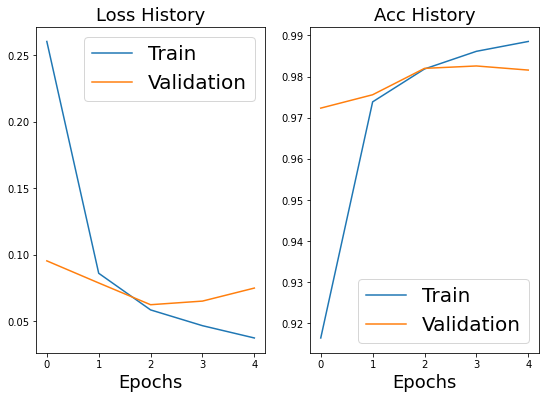

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))


axes[0].plot(hist.history['loss'], label='Train')
axes[0].plot(hist.history['val_loss'], label='Validation')
axes[0].set_title("Loss History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=20);

axes[1].plot(hist.history['accuracy'], label='Train')
axes[1].plot(hist.history['val_accuracy'], label='Validation')
axes[1].set_title("Acc History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[1].legend(fontsize=20)

# Final accuracy
print ("Training Acc:", hist.history['accuracy'][-1])
print ("Validation Acc:", hist.history['val_accuracy'][-1])

313/313 [==============================] - 4s 13ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.96      0.99      0.97      1032
           3       1.00      0.97      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




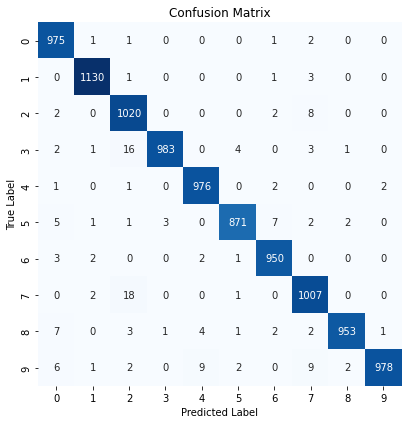

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# convert form prediction to id
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

# convert from one-hot to original 
# (we could take the original)
y_true = np.argmax(test_labels, axis=1) # argmax along axis 1

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

# compute confusion matrix
mat = confusion_matrix(y_true, y_pred)

fig, axes = plt.subplots(figsize=(6,6), tight_layout=True)
sns.heatmap(mat, square=True, annot=True, fmt='d', 
            cbar=False, cmap="Blues")
axes.set_xlabel('Predicted Label');
axes.set_ylabel('True Label')
axes.set_title('Confusion Matrix')
print()

## Comments

- This network is apparently much more complex:
  - 5 layers !
- You should experience this network eventually performs better than the other we have seen before.


- We used a new activation function named `relu` (rectified linear unit)
  - $relu(x) = \max(x,0)$
  - this was developed quite recently, and it performs very well (cheaper to be computed, better convergence)
  - we will use `relu` almost everywhere from now on
  

- We used two new layers `Conv2D` and `MaxPooling2D`.
  - This are specific for images (2D data)
  - Equivalent exist for 1D and 3D data
  - We illustrate this below
  

- We added one fake dimension to the data:
  - `train_images.reshape((60000, 28, 28, 1))`
  - This is because, when dealing with images, Keras expects to have 3 dimensions, where the third is for the channels:
  - `(60000, 28, 28, 1)` refers to a single (grayscale) channel
  - `(60000, 28, 28, 3)` refers to the usual RGB channels
  

- We still use SoftMax as usual.

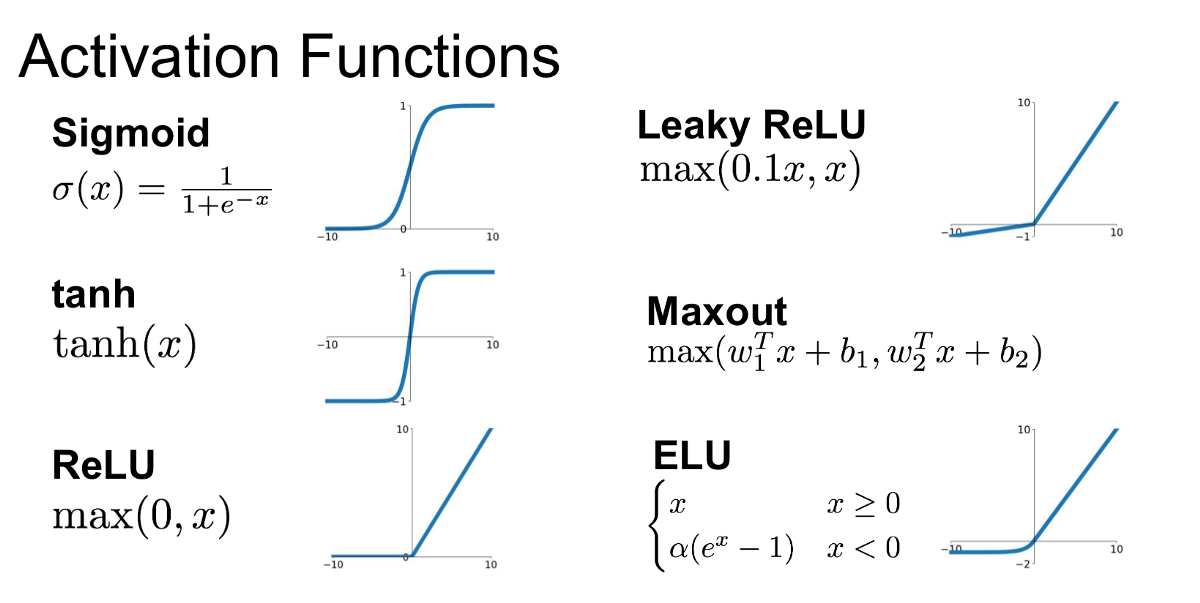

## Convolution Filters

- A convolution filter behaves as follows:

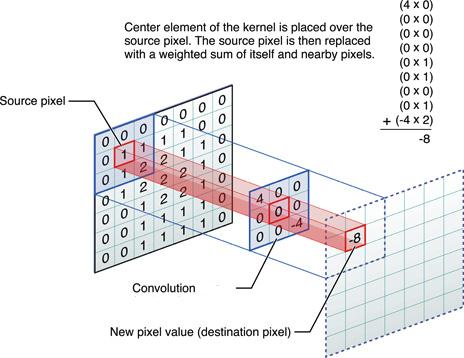

- Filters are applied, pixel by pixel, to the whole image (matrix)
- Note that, given a matrix it returns a matrix of the same size
- Filters are usually small compared to the image
- The output of the filter on a single pixel is usually called **response**
- In our example:
   - `Conv2D( 32, (3, 3) )` means 32 filters each of size 3x3
   - Therefore this generates 32 images starting from one
- the values of the filter are new parameters/weights tuned by the learning process
- there are specific ways to process point out of the image borders (e.g., repeat boder values)

Important properties:
- Convolution filters are **translation invariant**:
  - if the filter finds a pixel with an high repose, it will find the same pixel even if the image is translated
  

- Convolution network learn **spatial hierarchies of patterns**:
  - higher layers (closer to the output) combine lower layers in possible spatial structures
  - we can think about filters as returning pattern presence response
  

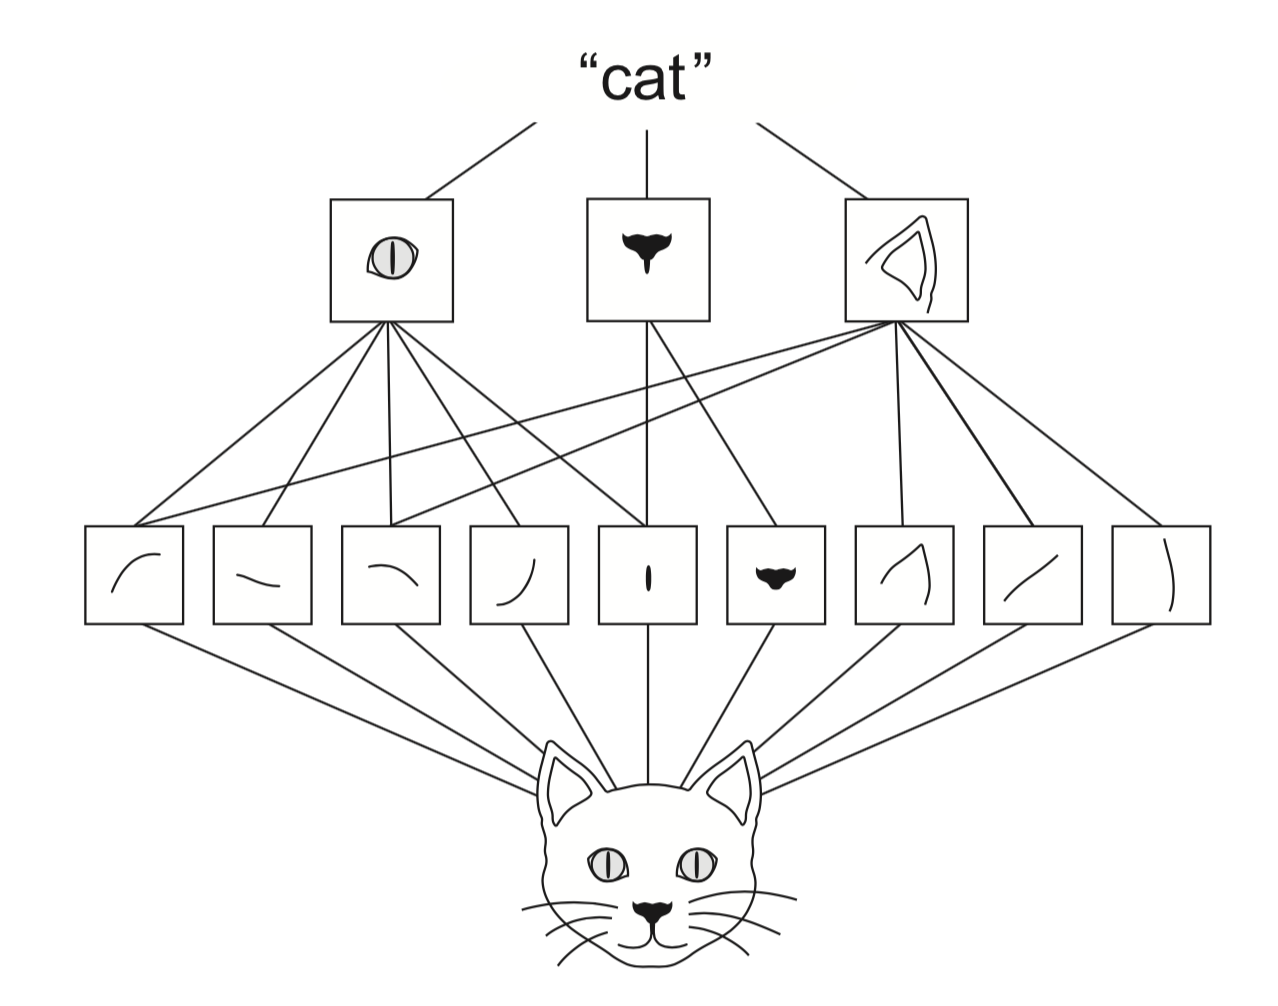

## Pooling Layers

- Pooling layers work as follows:

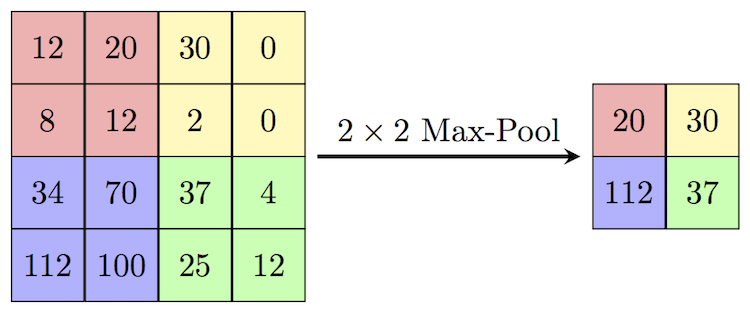

- Filter generate pattern presence response, which is typically very redundant
  - a pattern many not be present at all in a large neighbourhood of pixels
  - as the response is always present (possibly small) generally we care about the pattern with the largest response
- Filters may significantly enlarge the input data


- MaxPooling selects the largest response in a given area, and discards the remaining resposne.
  - A MaxPool of size 2x2 will generate 1 output for every non overlapping 2x2 square
  - It implements a subsampling, therefore smartly reducing the data we need to deal with
  - We always used 2x2 pooling, therefore halving the data passing through the layer

## Last Classification Layers

- At some point the pooling layers must converge to the 10 probability estimates to be given as output

- The prediction is generated with two dense layers as we did previously

- The output of the last pooling must prepared for the two dense layers
  - pooling produces matrices width x height x # channels
  - the dense layer takes a *flat* list of signals

- The matching is achieved through the **Flatten** layer

- Ultimately 10 nodes and softmax must be used for predicting one of the 10 classes.

## Benefits of Convolutional Filters + MaxPooling vs. Dense Layers

- Convolutional filters are translation invariant, while
- Dense layers focus (i.e., learn weights for a specific pixel)


- Max Pooling reduces the data size significantly each time it is applied

- Max Pooling has no weights/parameters
- Filters have little parameters
  - a 3x3 filter has 9 params regardless the input size
- Dense layers generate a large number of connections/weights/parameters
  - \# number of nodes $\times$ # of nodes in the previous layer
- More parameters mean a network more complex, expensive and difficult tune

## Funnel or Information compression

- A cascade of layers with a decreasing number of outputs creates a "funnel" effect, where the information coming from the previous layer must be somehow compressed in to a smaller number of outputs. Ultimately this is compressed in the prediction.

- Intermediate layers should be sufficiently large to capture all the meaningful information and to allow prediction
  - We have an information bottleneck when layers are not large enough
  - For instance, in a multi-class classification problem with $N$ classes, having an intermediate layer with  $n<N$ nodes it is likely to become a bottleneck
  - $n$ nodes do not enclose enough information to distinguish among $N$ classes.

## Inspecting the Neural Network

After training the Neural Network we can inspect which input image generates the largest activation at different levels of the network.

See: https://distill.pub/2017/feature-visualization/

## A typical convolution network architecture

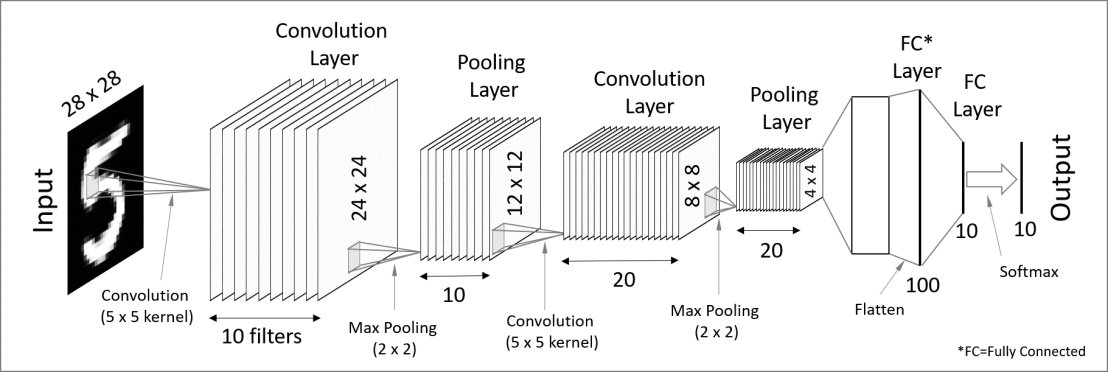

## Exercise: 
 - Create a new notebook from scratch.
 - Implement the above network and compare with the ones we saw before.
 - Use the handwritten digit recognition dataset.


## 1D Convolutions

Convolution can be 1-Dimensional, for example to analyze time series.
- a convolution with a filter [1/3, 1/3, 1/3] is a rolling average

Below an example from a real time series-classification example.

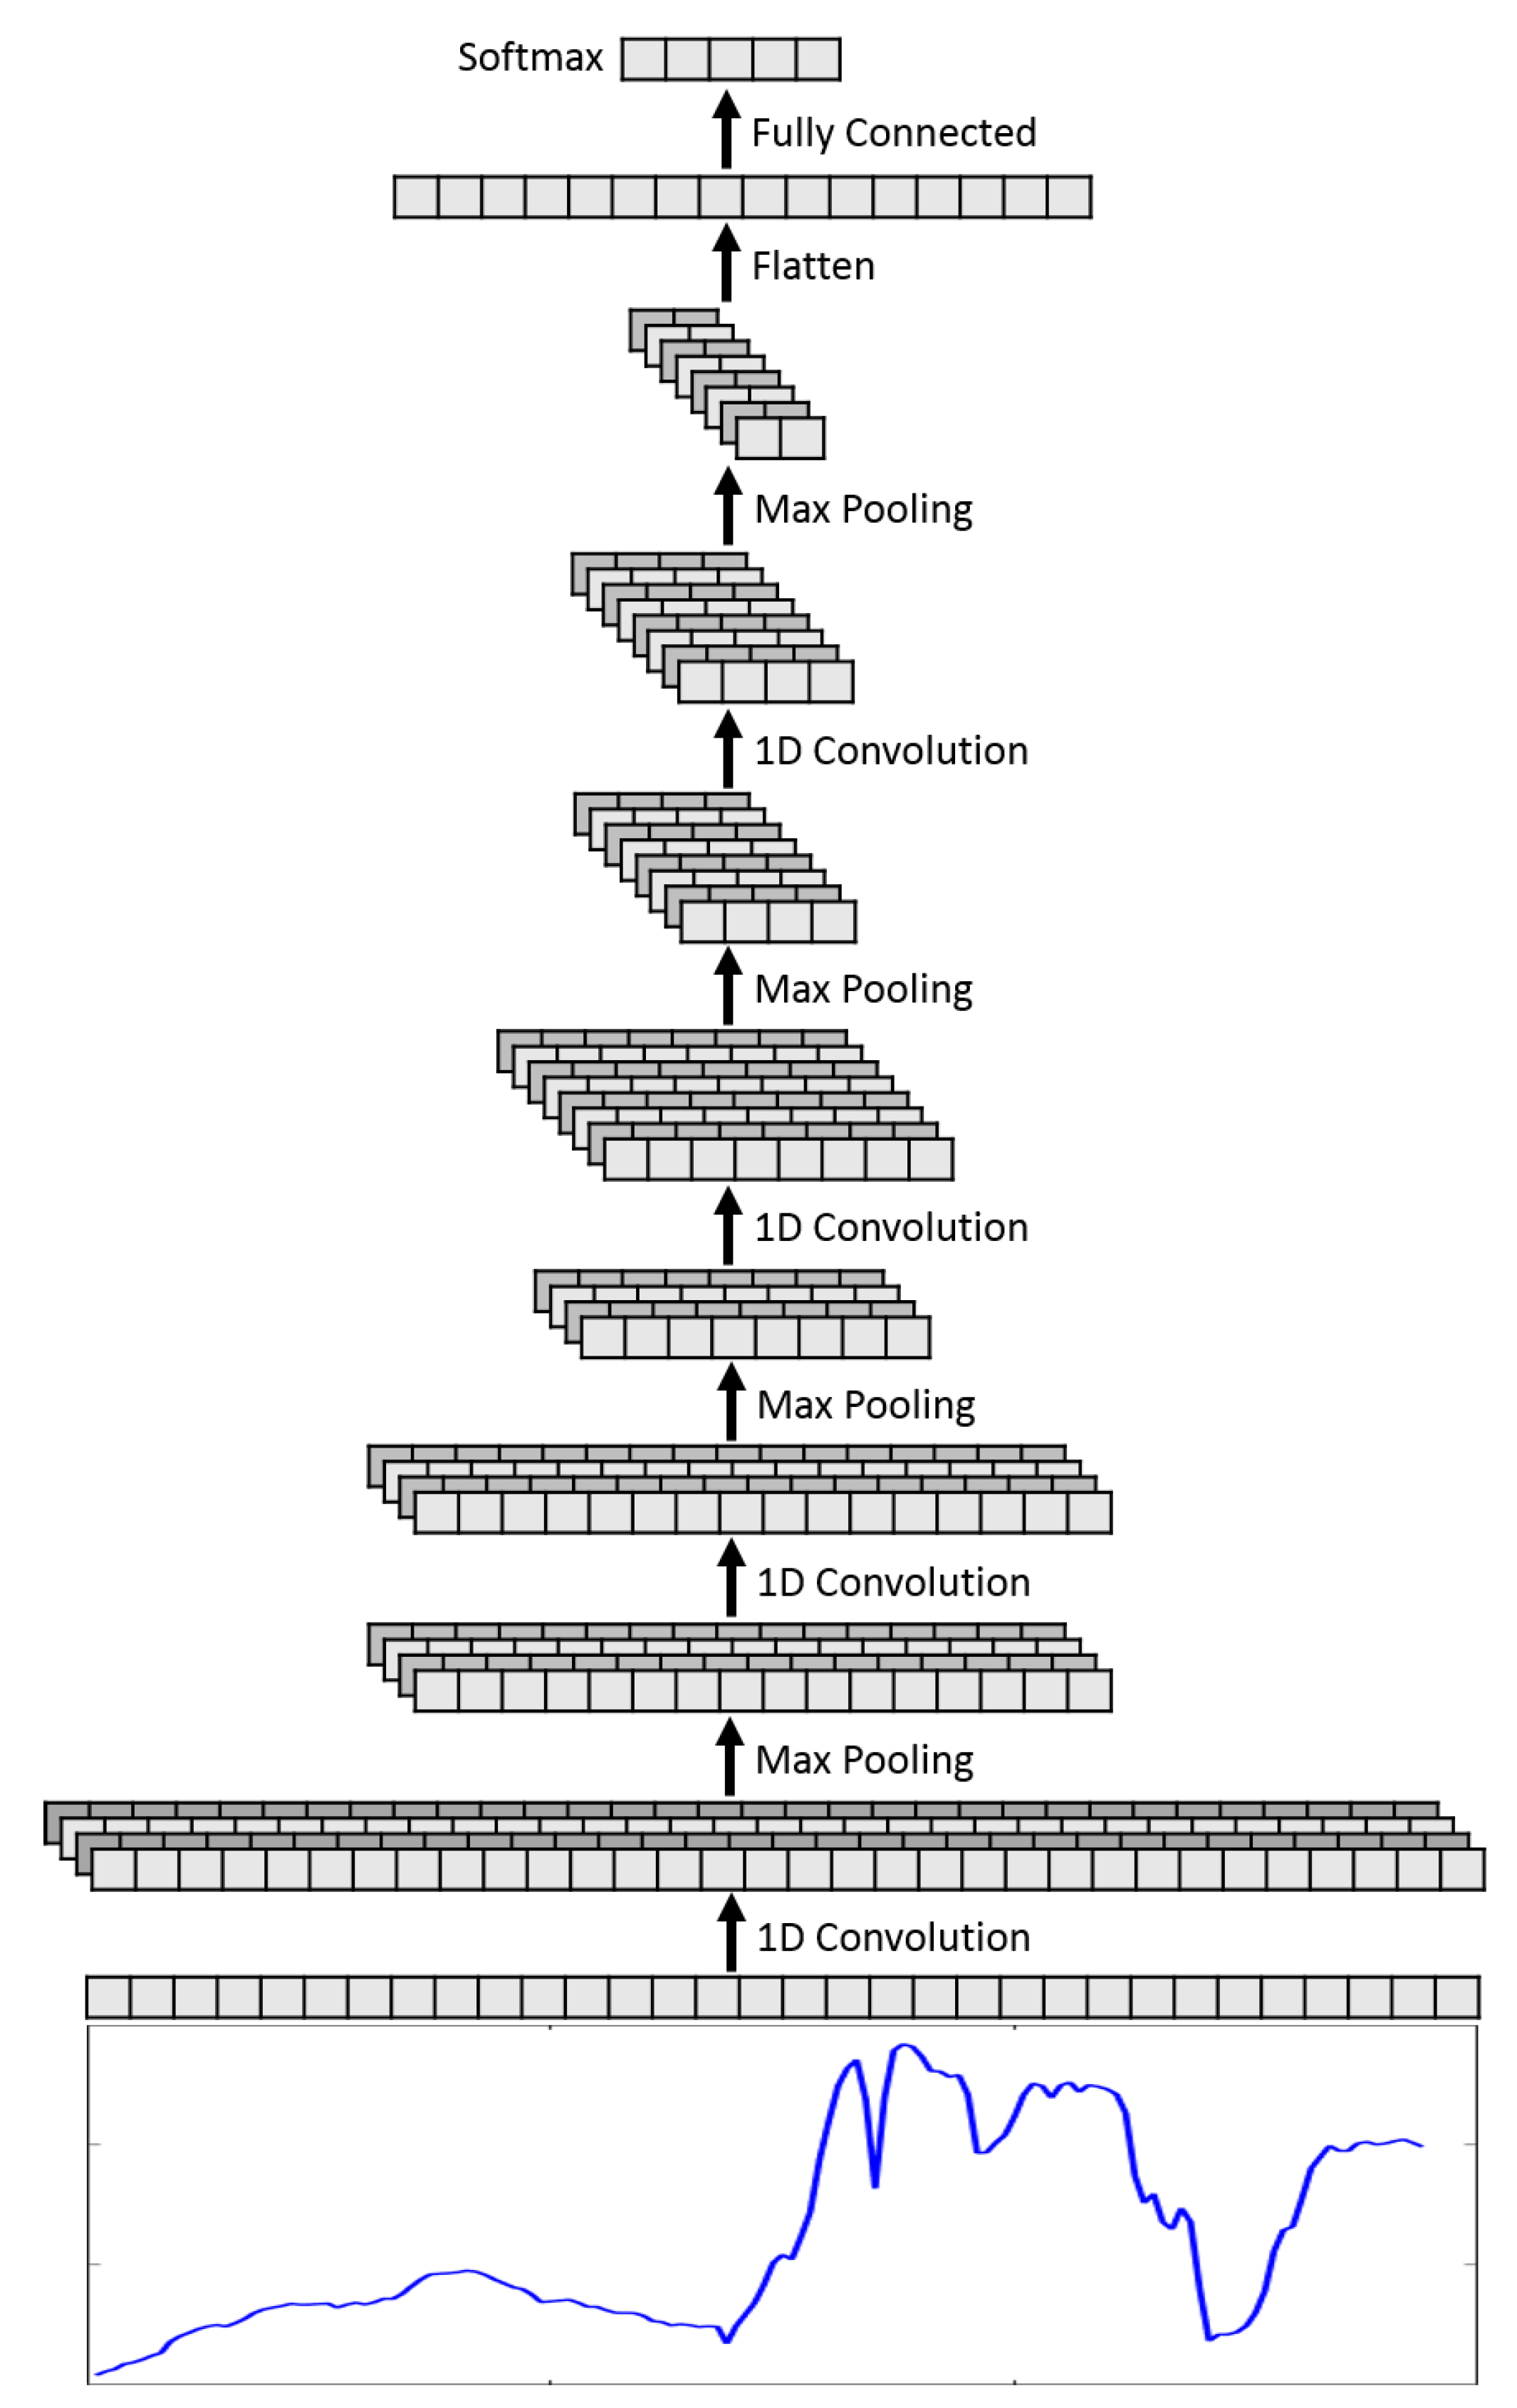

## Exercise: Implement the above network for stock price prediction
 
- Note: 
  - the pooling is clearly of size 2, the width of the filter window is not clear
  - the above network is for classification, we need stock price prediction

## Short Summary

- 2D and 1D-Convolution generate spatio-temporal features

- Typical architectures have a funnel shape based on Convolution+Pooling, complete by one or two Fully Connected layers


## Stock Prediction Dataset

https://www.kaggle.com/camnugent/sandp500/home

### Context

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by. Here I provide a dataset with historical stock prices (last 5 years) for all companies currently found on the S&P 500 index.

The script I used to acquire all of these .csv files can be found in this GitHub repository In the future if you wish for a more up to date dataset, this can be used to acquire new versions of the .csv files.


## Loading the data

In [ ]:
import pandas as pd

# change path
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/all_stocks_5yr.csv")

print(data.shape)
data.describe().T

(619040, 7)


,count,mean,std,min,25%,50%,75%,max
open,619029.0,8.302333e+01,9.737877e+01,1.62,40.220,62.59,94.37,2.044000e+03
high,619032.0,8.377831e+01,9.820752e+01,1.69,40.620,63.15,95.18,2.067990e+03
low,619032.0,8.225610e+01,9.650742e+01,1.50,39.830,62.02,93.54,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,94.41,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4284509.25,6.182376e+08


In [ ]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data["Name"].value_counts()

AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [ ]:
data["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [ ]:
apple_data = data[ data['Name']=='AAPL' ]

apple_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [ ]:
apple_data.head(10)

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
1264,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
1265,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
1266,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
1267,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
1268,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [ ]:
apple_data.tail(10)

,date,open,high,low,close,volume,Name
2508,2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL
2509,2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL
2510,2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL
2511,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL
2512,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL
2513,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL
2514,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL
2515,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL
2516,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL
2517,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL


In [ ]:
apple_closing = apple_data['close'].values

print(apple_closing)
print (type(apple_closing))



[ 67.8542  68.5614  66.8428 ... 156.49   163.03   159.54  ]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
apple_closing = scaler.fit_transform(apple_closing.reshape(-1,1))

apple_closing

array([[-1.34925318],
       [-1.32610021],
       [-1.38236534],
       ...,
       [ 1.55258824],
       [ 1.76670085],
       [ 1.65244198]])

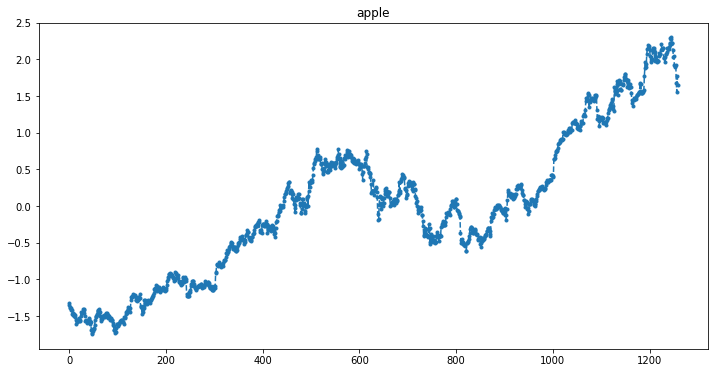

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(apple_closing, '.--')

ax.set_title('apple');

Text(0.5, 1.0, 'apple')

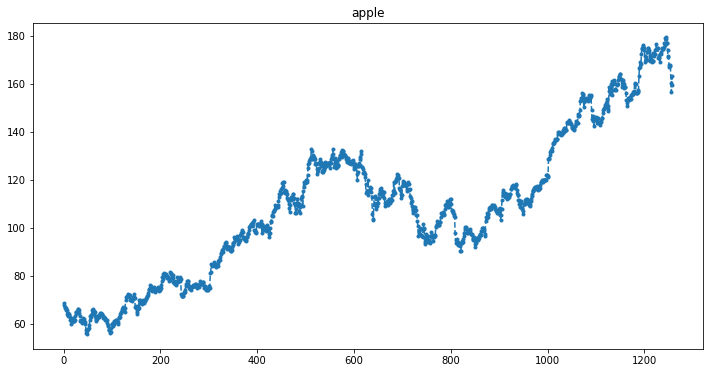

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(scaler.inverse_transform(apple_closing), '.--')

ax.set_title('apple');

In [ ]:
import numpy as np
def prepare (y,w):
    XX = np.array( [ y[i:i+w] for i in range(len(y)-w) ] )
    YY = np.array( y[w:])
    return XX, YY

window = 100
train_x, train_y = prepare(apple_closing, window)

print (train_x.shape)
print (train_y.shape)

(1159, 100, 1)
(1159, 1)


## Prepare the network

Careful with the input shape!

You must use 1D convolutions:
 - https://keras.io/api/layers/convolution_layers/convolution1d/
 - https://keras.io/api/layers/pooling_layers/max_pooling1d/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

# initialize the network
model = Sequential()

model.add( Conv1D(4, 5, input_shape=(window,1))) 
model.add( Activation("relu") )
model.add( MaxPooling1D(2) )

model.add( Conv1D(4, 5)) 
model.add( Activation("relu") )
model.add( MaxPooling1D(2) )

model.add( Conv1D(8, 5) )
model.add( Activation("relu") )
model.add( MaxPooling1D(2) )

model.add( Conv1D(8, 5) )
model.add( Activation("relu") )
model.add( MaxPooling1D(2) )

model.add( Flatten() )
model.add( Dense(1) )

# finalize the network
model.compile( optimizer="rmsprop",
               loss='mse',
               metrics=['mean_absolute_error'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 96, 4)             24        
                                                                 
 activation_5 (Activation)   (None, 96, 4)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 4)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 4)             84        
                                                                 
 activation_6 (Activation)   (None, 44, 4)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 22, 4)            0         
 1D)                                                  

In [ ]:
# train the network
hist = model.fit( x=train_x, # training examples
                  y=train_y, # desired output
                  epochs=100,      # number of training epochs 
                  verbose=0)

37/37 [==============================] - 0s 3ms/step - loss: 0.0257 - mean_absolute_error: 0.1268
[0.025707410648465157, 0.12681980431079865]


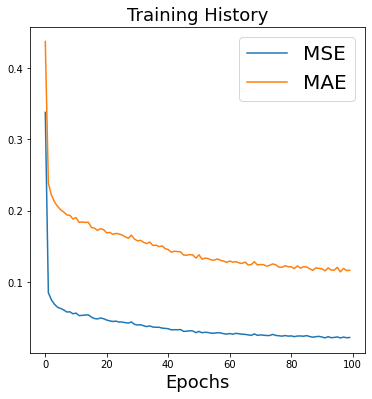

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='MSE')
axes.plot(hist.history['mean_absolute_error'], label='MAE')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ( model.evaluate(train_x, train_y))

## Improve the network


- We may need a Dense layer between flatten and the output
- You may use a completely different architecture

## Interpretation of Filters

(5, 1, 4)


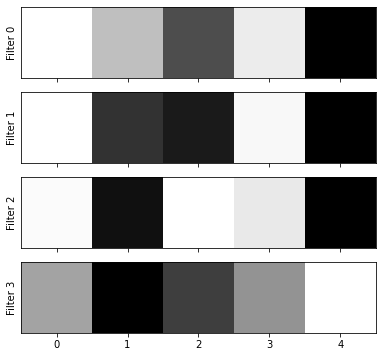

In [ ]:
import math

layer   = model.get_layer(index=0)
filters = layer.get_weights()[0]

print (filters.shape)

height, width, num_filters = filters.shape

fig, axes = plt.subplots(num_filters, 1, sharex=True, sharey=True, 
                       figsize=(12,6))

for i, ax in enumerate(axes):
    ax.imshow(filters[:,:,i].T, cmap='gray')
    ax.set_yticks([])
    ax.set_ylabel('Filter {}'.format(i))


In [ ]:
filters[:,:,0]

array([[ 0.4869284 ],
       [ 0.31958082],
       [ 0.02285132],
       [ 0.4371173 ],
       [-0.17850067]], dtype=float32)

## Compare True Values vs. Predicted values

37/37 [==============================] - 0s 3ms/step


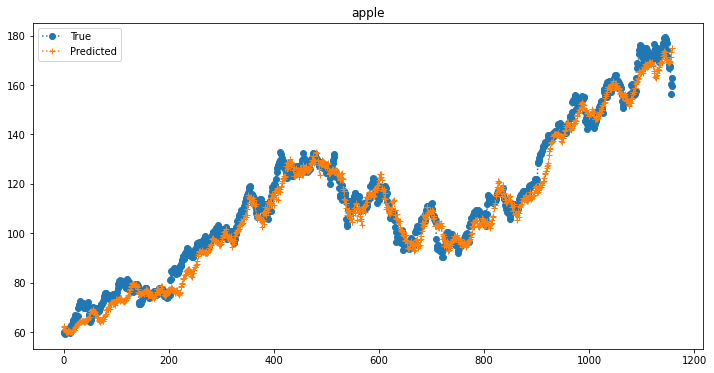

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = model.predict(train_x)


fig,ax = plt.subplots(figsize=(12,6))
ax.plot(scaler.inverse_transform(train_y), 'o:', label='True')
ax.plot(scaler.inverse_transform(y_pred),  '+:', label='Predicted')

ax.set_title('apple')
ax.legend();